In [1]:
#YAPAY SİNİR AĞLARI

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
data = pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
from tensorflow.keras.models import Sequential #Helps to create Forward and backward propogation
from tensorflow.keras.layers import Dense #Helps to create neurons in ANN
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU #activation functions

In [4]:
classifier=Sequential()

In [5]:
classifier.add(Dense(units=11,activation='relu'))

In [6]:
classifier.add(Dense(units=7,activation='relu'))

In [7]:
classifier.add(Dense(units=6,activation='relu'))

In [8]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [9]:
classifier.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [10]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [11]:
X=data.iloc[:,1:14]
X
y=data['Heart_Disease']

In [12]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

y= label_encoder.fit_transform(y)

In [13]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
12/12 [==============================] - 2s 57ms/step - loss: 0.8470 - accuracy: 0.6000 - val_loss: 1.0453 - val_accuracy: 0.5500
Epoch 2/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.8575 - accuracy: 0.6417 - val_loss: 0.8153 - val_accuracy: 0.6167
Epoch 3/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.7333 - accuracy: 0.6167 - val_loss: 0.7968 - val_accuracy: 0.5333
Epoch 4/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.7056 - accuracy: 0.6417 - val_loss: 0.7732 - val_accuracy: 0.6167
Epoch 5/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.7068 - accuracy: 0.6667 - val_loss: 0.7605 - val_accuracy: 0.5667
Epoch 6/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.6976 - accuracy: 0.6500 - val_loss: 0.7451 - val_accuracy: 0.5833
Epoch 7/1000
12/12 [==============================] - 0s 10ms/step - loss: 0.7028 - accuracy: 0.6667 - val_loss: 0.7357 - val_accuracy: 0.6000

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3/3 [==============================] - 0s 4ms/step


In [17]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [18]:
score

0.8555555555555555

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) #karmaşıklık matrisi

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[51  3]
 [10 26]]

True Positives(TP) =  51

True Negatives(TN) =  26

False Positives(FP) =  3

False Negatives(FN) =  10


<Axes: >

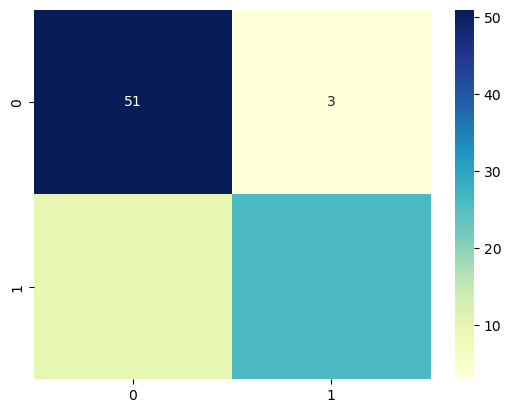

In [20]:
m_matrix= pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        54
           1       0.90      0.72      0.80        36

    accuracy                           0.86        90
   macro avg       0.87      0.83      0.84        90
weighted avg       0.86      0.86      0.85        90



In [22]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [23]:
#Sınıflandırma Doğruluğu 
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Sınıflandırma Doğruluğu: {0:0.4f}'.format(classification_accuracy))

Sınıflandırma Doğruluğu: 0.8556


In [24]:

precision = TP / float(TP + FP)

print('Hassasiyet : {0:0.4f}'.format(precision))

Hassasiyet : 0.9444


In [25]:

specificity = TN / (TN + FP)

print('Özgüllük: {0:0.4f}'.format(specificity))

Özgüllük: 0.8966


In [26]:

recall = TP / float(TP + FN)

print('duyarlılık : {0:0.4f}'.format(recall))

duyarlılık : 0.8361


In [27]:
y_pred = classifier.predict(X_test)


3/3 [==============================] - 0s 5ms/step


In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [30]:
roc_auc = auc(fpr, tpr)


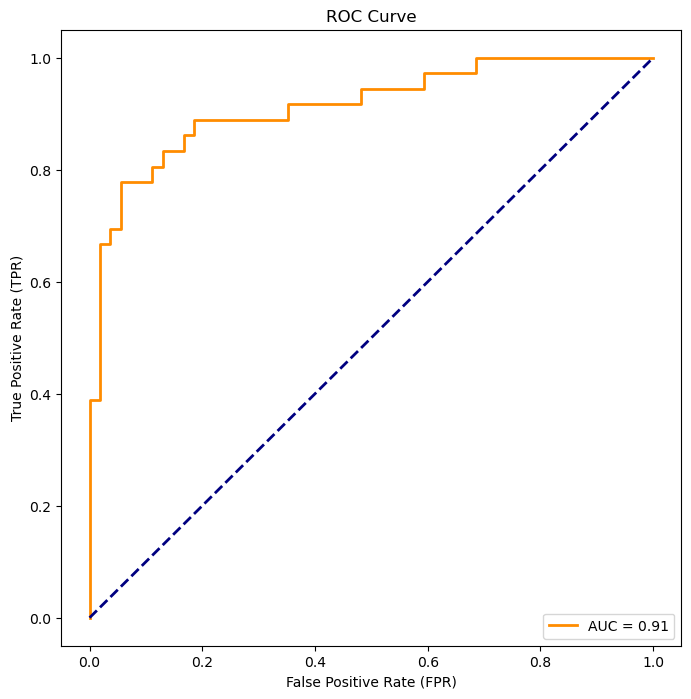

In [31]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()